# Weighted Graph

In [1]:
import math
import string
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
class Node:
    """PiorityQueue Node"""
    
    def __init__(self, value, priority):
        self.value = value
        self.priority = priority
        
        
class PriorityQueue:
    
    def __init__(self):
        self.values = []
        
        
    def enqueue(self, value, priority):
        """
        Enqueue method accepts a value and priority, makes a new node,
        and puts in the right spot based off of its priority
        """
        
        new_node = Node(value, priority)
        # append the value into the values property on the heap
        self.values.append(new_node)
        self.bubble_up()
        
        
    def bubble_up(self):
        """
        Method to 'bubble up' last node in values list
        to the correct spot
        """
        idx = len(self.values)-1
        element = self.values[idx]
        parent_idx = int((idx-1)/2)
        parent = self.values[parent_idx]
        
        # keep looping as long as the values element at the parent_index
        # is less than the values element at the child index
        while idx > 0 and element.priority < parent.priority:
            # swap the value of the values element at the parent_index
            # with the value of the element property at the child index
            self.values[parent_idx], self.values[idx] =  self.values[idx], self.values[parent_idx]
            # set the index to be parent_index, and start over
            idx = parent_idx
            parent_idx = int((idx-1)/2)
            parent = self.values[parent_idx]
            
        return self
        
        
    def dequeue(self):
        """
        Romoves root from the heap. Rearrange values in heap.
        Returns old root
        """
        if not self.values:
            return None
        # swap the first value in values property with the last one
        last_index = len(self.values) - 1 
        self.values[0], self.values[last_index] = self.values[last_index], self.values[0]
        # pop from the values property to return the value at the end
        ex_root = self.values.pop()
        # call sink_down function to place 'new root' to correct spot
        if self.values:
            self.sink_down()
        
        return ex_root
        
    
    def sink_down(self):
        """Function to 'sink-down' root to the correct spot"""
        
        # parent index starts at 0
        idx = 0
        length = len(self.values)
        element = self.values[0]
        while True:
            # left child index
            left_child_idx = 2 * idx + 1
            # right child index
            right_child_idx = 2 * idx + 2
            # index of element to swap with
            swap = None
            
            # need to swap parent element with the largest child
            # if child is greater than parent
            
            # if left child exist
            if left_child_idx < length:
                left_child = self.values[left_child_idx]
                # and left child is greater than element to 'sink-down'
                if left_child.priority < element.priority:
                    # swap index is left child index
                    swap = left_child_idx
            # if right child exist
            if right_child_idx < length:
                right_child = self.values[right_child_idx]
                # if swap index was not found before (left child is less than element)
                # and right child is greater than element
                # or if swap index was found before (lift child is greater than element)
                # but right child is greater than left child
                if (not swap and right_child.priority < element.priority) or \
                    (swap and right_child.priority < left_child.priority):
                        # swap index is right child index
                        swap = right_child_idx
            # if left and right children is less then element
            # then parent element is in correct spot
            if not swap:
                break
            # if swap index was found swap parent with one of children
            self.values[idx], self.values[swap] = self.values[swap], self.values[idx]
            # index of parent element after swap
            idx = swap
            
            
    def graph(self):
        """
        Builds Piority Queue graph with node tree level, 
        priority and value labels
        """
        
        nodes = self.values
        # string representation of nodes
        nodes_str = []
        
        if not len(nodes):
            return None
        max_graph = nx.Graph()
        root_node = nodes[0]
        # string representation of root node
        root_node_str = f'ROOT(P: {root_node.priority}, V: {root_node.value})' 
        nodes_str.append(root_node_str)
        # add root node on graph
        max_graph.add_node(root_node_str)
        for i in range(len(nodes)):
            # left and right children indexes of the current parent element
            left_child_idx = 2*i + 1
            right_child_idx = 2*i + 2
            # binary tree level of parent element
            parent_level = int(math.log2(i+1))
            # if left child exist
            if len(nodes) > left_child_idx:
                left_child = nodes[left_child_idx]
                # string representation of left child
                left_child_str = f'{parent_level+1}L(P: {left_child.priority}, V: {left_child.value})'
                nodes_str.append(left_child_str)
                # add left child on graph and draw connection with parent
                max_graph.add_node(left_child_str)
                max_graph.add_edge(nodes_str[i], left_child_str)
            # if right child exist
            if len(nodes) > right_child_idx:
                right_child = nodes[right_child_idx]
                # string representation of right child
                right_child_str = f'{parent_level+1}R(P: {right_child.priority}, V: {right_child.value})'
                nodes_str.append(right_child_str)
                # add right child on graph and draw connection with parent
                max_graph.add_node(right_child_str)
                max_graph.add_edge(nodes_str[i], right_child_str)
        
        print("Nodes of graph: ", max_graph.nodes())
        nx.draw(max_graph, with_labels = True)
        plt.show()

In [19]:
class WeightedGraph:
    
    def __init__(self):
        
        self.adjacency_dct = {}
        
    
    def add_vertex(self, vertex):
        """
        Method to add vertex. Acceppts a name of a vertex.
        Adds a key to adjacency list with the name of the vertex
        and sets its value to be an empty dictionary.
        """
        
        if not self.adjacency_dct.get(vertex): 
            self.adjacency_dct[vertex] = []
        
    
    def add_edge(self, vertex1, vertex2, weight):
        """
        Method accepts two vertices. It finds in the adjacency list 
        the key of vertex1 and append vertex2 to the list and 
        vice versa
        """
        
        # check if both vertexes exist 
        if vertex1 in self.adjacency_dct and vertex2 in self.adjacency_dct:
            self.adjacency_dct[vertex1].append({'node': vertex2, 'weight': weight})
            self.adjacency_dct[vertex2].append({'node': vertex1, 'weight': weight})
            
            
    def graph(self):
        """Builds a Weighted Graph """
        
        if not self.adjacency_dct:
            return None
        
        G = nx.Graph()
        G.add_nodes_from(self.adjacency_dct.keys())
        for vertex, neighbours in self.adjacency_dct.items():
            for neighbour in neighbours:
                G.add_edge(vertex, neighbour['node'], 
                            weight=neighbour['weight'])
        print("Nodes of graph: ", G.nodes())
        pos = nx.spring_layout(G)
        nx.draw_networkx_nodes(G, pos)
        nx.draw_networkx_labels(G, pos)
        nx.draw_networkx_edges(G, pos)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        print(G.edges)
        plt.show()
        
        
    def shortest_path(self, start_vertex, end_vertex):
        """
        Method accepts a starting and ending vertices.
        Returns shortest path between those vertices.
        Method implements Dijkstra algorithm.
        """
        
#         path = []
        
        # distances dict with graph vertices as keys
        # and total distance from start_vertex to the key (vertex) as values
        # initaially each key (vertex) set with a velue of infinity,
        # except for the starting vertex which should have a value of 0
        distances = dict.fromkeys(self.adjacency_dct.keys(), np.inf)
        distances[start_vertex] = 0
        # add each vertex with a priority of Infinity to the priority
        # queue, except the starting vertex, which should have a prioryty of 0
        # because thats's where we begin
        priority_queue = PriorityQueue()
        for key in self.adjacency_dct.keys():
            if key == start_vertex:
                priority = 0
            else:
                priority = np.inf
            priority_queue.enqueue(key, priority)
        # previous dict with graph vertices as keys
        # and previous vertices used to reach key vertice from start vertice
        # with the shortest distance as values
        # initially set for each key value of None
        previous = dict.fromkeys(self.adjacency_dct.keys(), None)
        # looping as long as there is anything in the priority queue
        while priority_queue.values:
            # dequeue vertx from a priority queue
            vertex = priority_queue.dequeue()
            
            # loop through the each value in the adjacency list 
            if vertex.value != end_vertex:
                for neighbour in self.adjacency_dct[vertex.value]:
                    # calculate the distance to that vertex from the starting vertex
                    neighbour_distance = distances[vertex.value] + neighbour['weight']
                    # if the distance is less than what is currently stored
                    # in our distances dict
                    if neighbour_distance < distances[neighbour['node']]:
                        # update the distances dict with new lower distance
                        distances[neighbour['node']] = neighbour_distance
                        # update the previous dict to contain that vertex
                        previous[neighbour['node']] = vertex.value
                        # enqueue  the vertex with the total distance 
                        # from the start node
                        priority_queue.enqueue(neighbour['node'], neighbour_distance)
            # if dequeued vertex is the same as the ending vertex we are done
            else:                 
                break 
        
        return previous, distances[end_vertex]
        
        
    def shortest_path_graph(self, start_vertex = None, end_vertex = None):
        """
        Builds Weighted Graph with shortest path from start vertex to
        end vertex. If no vertices passed than random vertices is chosen
        """
        
        
        if not self.adjacency_dct:
            return None
        
        # choose start and end vertices if they were not strictly defined
        if not start_vertex:
            start_vertex = random.choice(list(self.adjacency_dct.keys()))
        if not end_vertex:
            end_vertex = random.choice(list(self.adjacency_dct.keys()))
        
        previous, distance = self.shortest_path(start_vertex, end_vertex)
        
        # create graph nodes (vertices) and edges
        G = nx.Graph()
        G.add_nodes_from(self.adjacency_dct.keys())
        for vertex, neighbours in self.adjacency_dct.items():
            for neighbour in neighbours:
                G.add_edge(vertex, neighbour['node'], 
                            weight=neighbour['weight'])
        # nodes positions
        pos = nx.spring_layout(G)
        
        # check path from end vertex to start vertex (backwards)
        # edges list
        shortest_path_edges = []
        # intermedia nodes list (path vetices excluding start and end vertices)
        nodes_path_lst = []
        # check previous dct from end vertex
        vertex = end_vertex
        while vertex != start_vertex:
            # add node to the list
            nodes_path_lst.append(vertex)
            # if previus vertex exist
            if previous.get(vertex):
                # add edge from current vertex to previos vertex
                shortest_path_edges.append((previous.get(vertex), vertex))
                # move to previous vertex
                vertex = previous.get(vertex)
            # if previous vertx doesn't exist there is no path
            else:
                print('No path found')
                return None
            
        # create list of vertices which are not part of the path    
        nodes = list(G.nodes())
        for node in nodes_path_lst:
            nodes.remove(node)
        nodes.remove(start_vertex)
        if start_vertex != end_vertex:
            nodes_path_lst.remove(end_vertex)

        print("Nodes of graph: ", G.nodes())
        print(f'Start: {start_vertex}, Path: {nodes_path_lst[::-1]}, Finish: {end_vertex}, Min Distance: {distance}')
        # draw transparent vertices which are not part of the path
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, alpha = 0.5)
        # draw triangular green start vertex 
        nx.draw_networkx_nodes(G, pos, nodelist=[start_vertex], 
                               node_size=500, node_color='g', node_shape='v',linewidths = 2)
        # draw green intermedia vertices
        nx.draw_networkx_nodes(G, pos, nodelist= nodes_path_lst, node_size=400, node_color='g')
        # draw green squared end vertex
        nx.draw_networkx_nodes(G, pos, nodelist=[end_vertex], 
                               node_size=500, node_color='r', node_shape='s', linewidths = 2)
        nx.draw_networkx_labels(G, pos)

        nx.draw_networkx_edges(G, pos, style='dashed')
        nx.draw_networkx_edges(G, pos, edgelist= shortest_path_edges, width = 2, edge_color = 'r', arrows=True)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()

In [29]:
def generate_weighted_graph(n=10, p=0.2):
    """
    Function to generate rendom Weighted Graph
    """
    
    G = nx.fast_gnp_random_graph(n, p)
    mapping = dict(zip(G, string.ascii_uppercase))
    G = nx.relabel_nodes(G, mapping)
    edge_weights = [(*edge, random.randint(1, 10)) for edge in G.edges]
    vertices = list(G.nodes)
    wg = WeightedGraph()
    for vertex in vertices:
        wg.add_vertex(vertex)
    for edge in edge_weights:
        wg.add_edge(*edge)
        
    if [] in wg.adjacency_dct.values():
        print('Regenerate graph')
        wg = generate_weighted_graph(n, p)
        
    return wg

In [30]:
wg = WeightedGraph()

In [31]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B', 4), ('A', 'C', 2), ('C', 'D', 2), ('C', 'F', 4), 
         ('D', 'E', 3), ('D', 'F', 1), ('F', 'E', 1), ('B', 'E', 3)]

In [32]:
for vertex in vertices:
    wg.add_vertex(vertex)

In [33]:
for edge in edges:
    wg.add_edge(*edge)

In [34]:
wg.adjacency_dct

{'A': [{'node': 'B', 'weight': 4}, {'node': 'C', 'weight': 2}],
 'B': [{'node': 'A', 'weight': 4}, {'node': 'E', 'weight': 3}],
 'C': [{'node': 'A', 'weight': 2},
  {'node': 'D', 'weight': 2},
  {'node': 'F', 'weight': 4}],
 'D': [{'node': 'C', 'weight': 2},
  {'node': 'E', 'weight': 3},
  {'node': 'F', 'weight': 1}],
 'E': [{'node': 'D', 'weight': 3},
  {'node': 'F', 'weight': 1},
  {'node': 'B', 'weight': 3}],
 'F': [{'node': 'C', 'weight': 4},
  {'node': 'D', 'weight': 1},
  {'node': 'E', 'weight': 1}]}

Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F']
[('A', 'B'), ('A', 'C'), ('B', 'E'), ('C', 'D'), ('C', 'F'), ('D', 'E'), ('D', 'F'), ('E', 'F')]


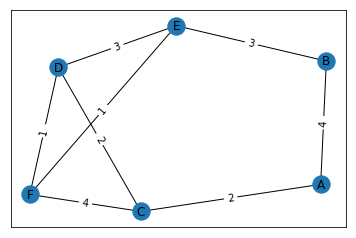

In [35]:
wg.graph()

In [36]:
wg.shortest_path('A', 'E')

({'A': None, 'B': 'A', 'C': 'A', 'D': 'C', 'E': 'F', 'F': 'D'}, 6)

Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F']
Start: C, Path: ['D', 'F'], Finish: E, Min Distance: 4


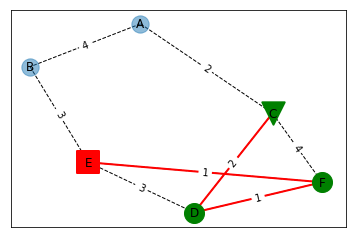

In [37]:
wg.shortest_path_graph('C', 'E')

Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F']
Start: F, Path: ['E'], Finish: B, Min Distance: 4


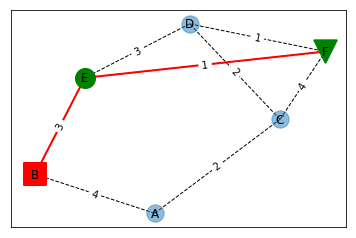

In [38]:
wg.shortest_path_graph()

Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F']
Start: B, Path: [], Finish: B, Min Distance: 0


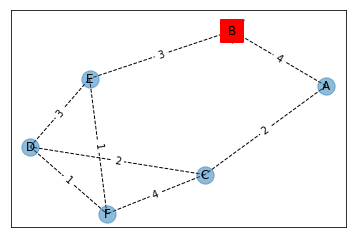

In [39]:
wg.shortest_path_graph('B', 'B')

In [40]:
wg = generate_weighted_graph()

Regenerate graph
Regenerate graph
Regenerate graph
Regenerate graph
Regenerate graph


Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
[('A', 'I'), ('B', 'J'), ('C', 'D'), ('C', 'E'), ('C', 'I'), ('C', 'J'), ('D', 'E'), ('D', 'G'), ('E', 'H'), ('F', 'I'), ('I', 'J')]


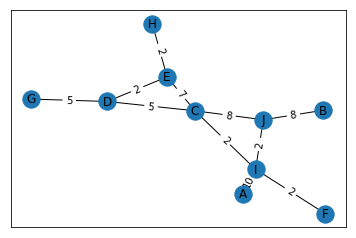

In [41]:
wg.graph()

Nodes of graph:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
Start: H, Path: ['E', 'C', 'I'], Finish: J, Min Distance: 13


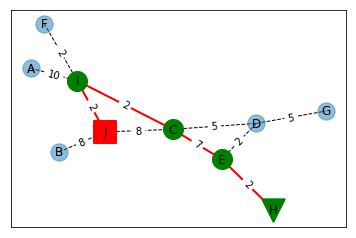

In [44]:
wg.shortest_path_graph()

In [45]:
wg.shortest_path('I', 'A')

({'A': 'I',
  'B': 'J',
  'C': 'I',
  'D': 'C',
  'E': 'C',
  'F': 'I',
  'G': 'D',
  'H': 'E',
  'I': None,
  'J': 'I'},
 10)